In [2]:
#Importamos Librerias Necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.manifold import TSNE
from math import sqrt
from scipy.stats import probplot
from sklearn.manifold import TSNE 

In [3]:
#Cargamos el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv',sep=';',decimal=',')

In [4]:
#Análisis Exploratorio de Datos
#Calidad de los datos
#Manejo de los Datos Duplicados
duplicated_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicated_rows.shape)

#Eliminamos los duplicados
df = df.drop_duplicates()

#Manejo de los datos unicos
#Se hace un bucle para recorrer cada columna para contar los valores distintos de cada una
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

#Verificamos los valores faltantes
print(df.isnull().sum()) 

number of duplicate rows:  (0, 7)
Edad: 47 distinct values
Sexo: 2 distinct values
IMC: 1025 distinct values
Hijos: 6 distinct values
Fumador: 2 distinct values
Region EEUU: 4 distinct values
Gastos: 1337 distinct values
Edad           0
Sexo           0
IMC            0
Hijos          0
Fumador        0
Region EEUU    0
Gastos         0
dtype: int64


In [5]:
#Información Estadistica del conjunto de datos
df.describe()

,Edad,IMC,Hijos,Gastos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.752451,1.094918,13362.998027
std,14.049960,7.170951,1.205493,12471.191679
min,18.000000,13.090000,0.000000,919.520000
25%,27.000000,25.520000,0.000000,4677.552500
50%,39.000000,30.260000,1.000000,9379.085000
75%,51.000000,35.430000,2.000000,16583.880000
max,64.000000,58.970000,5.000000,73233.660000


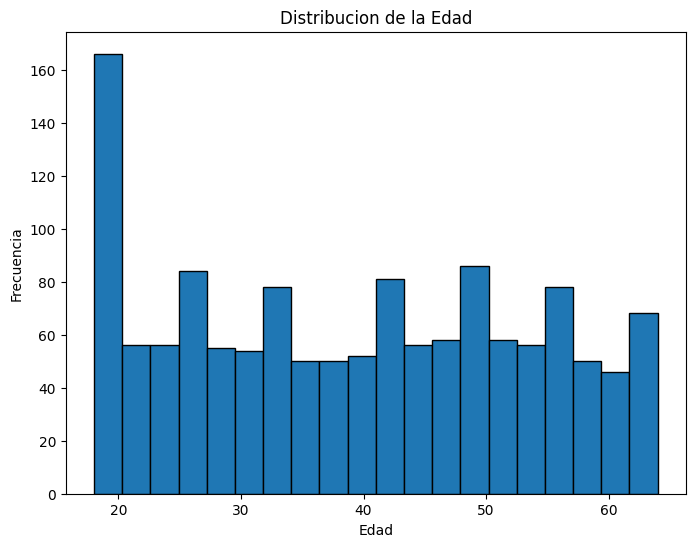

In [6]:
#Análisis Univariado
#Histograma para la distribucion de edad

plt.figure(figsize=(8,6))
plt.hist(df['Edad'], bins=20, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la Edad')
plt.show()

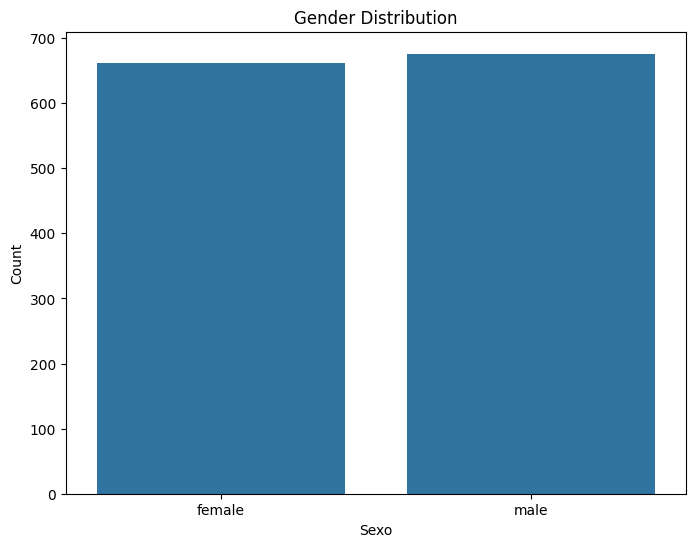

In [7]:
#Gráfico de barras para la distribución de genero
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Sexo')
plt.xlabel('Sexo')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

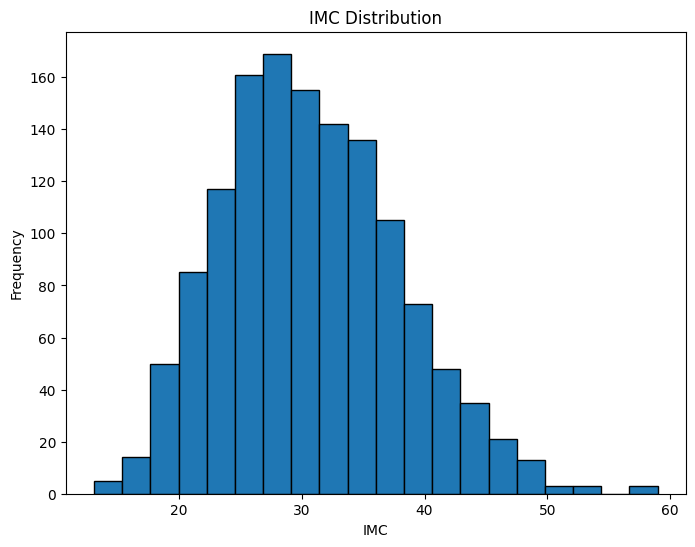

In [8]:
#Histograma para los valores de IMC

plt.figure(figsize=(8,6))
plt.hist(df['IMC'], bins=20, edgecolor='black')
plt.xlabel('IMC')
plt.ylabel('Frequency')
plt.title('IMC Distribution')
plt.show()

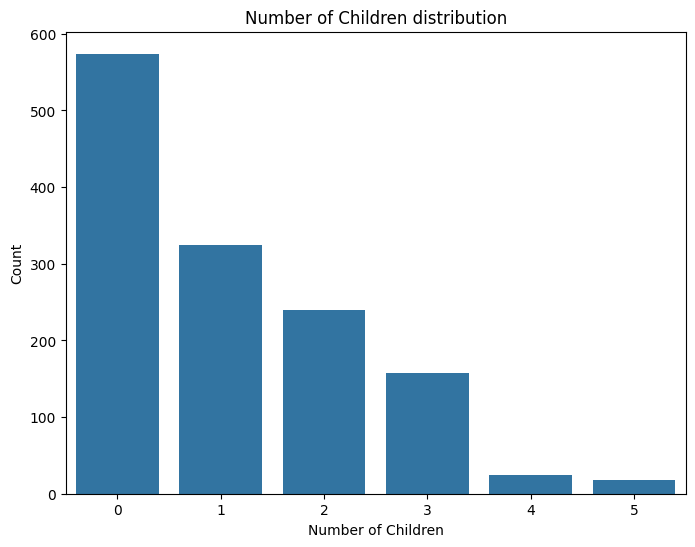

In [9]:
#Gráfico de barra para cantidad de hijos

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Hijos')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children distribution')
plt.show()

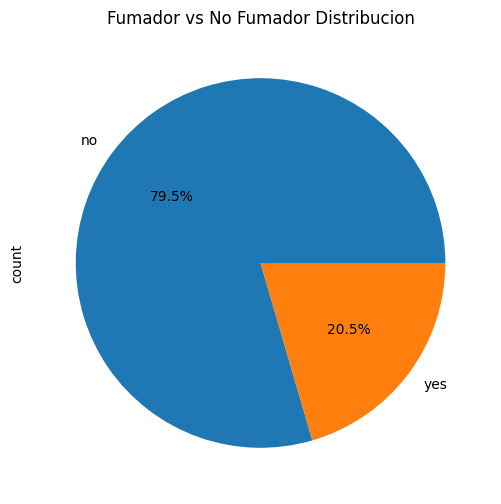

In [10]:
#Gráfico Circular para observar como se distribuyen los fumadores
plt.figure(figsize=(8,6))
df['Fumador'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fumador vs No Fumador Distribucion')
plt.show()

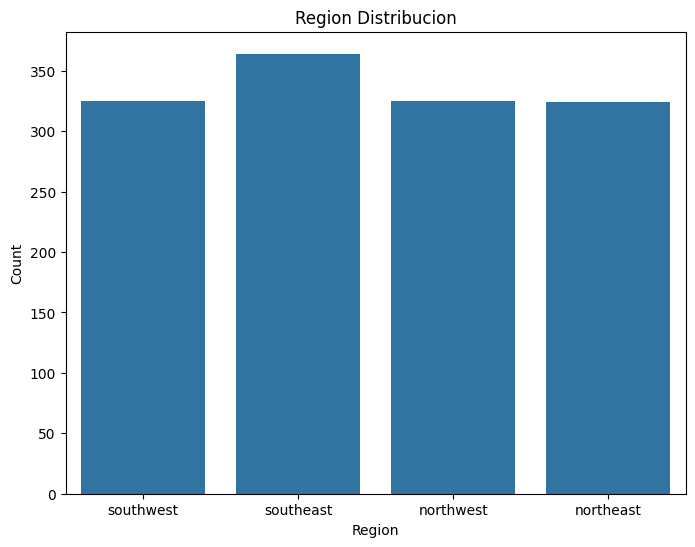

In [11]:
#Grafico de barra para distribucion de region

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Region EEUU')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribucion')
plt.show()

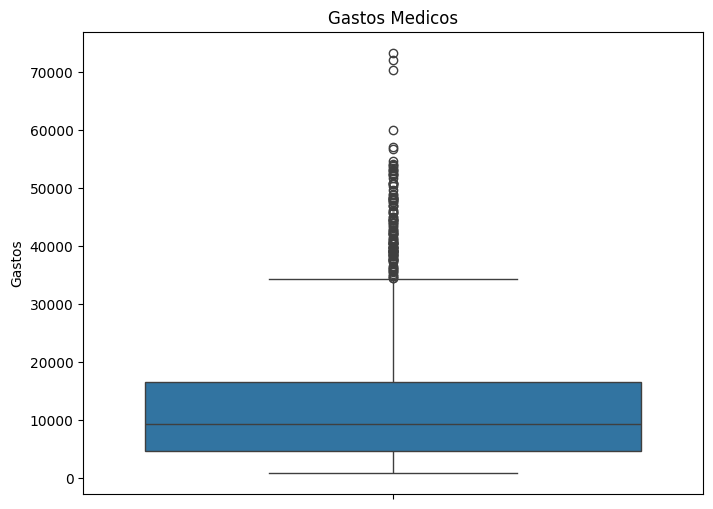

In [12]:
#Grafico de caja para los gastos medicos

plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Gastos')
plt.ylabel('Gastos')
plt.title('Gastos Medicos')
plt.show()

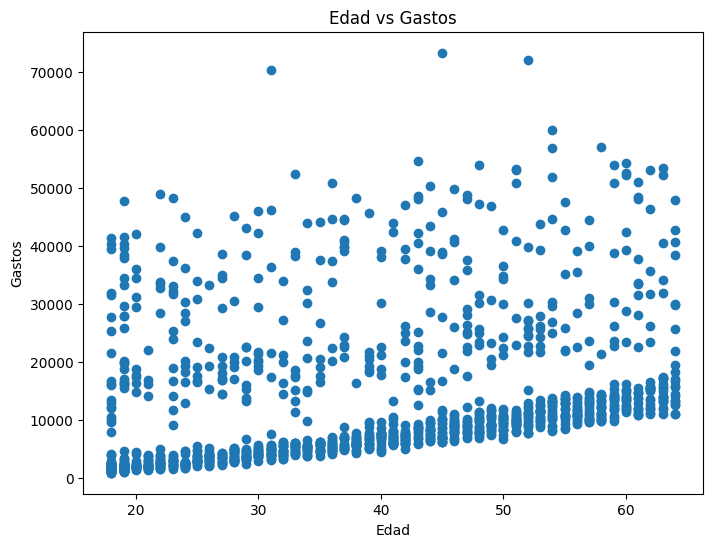

In [13]:
#Análisis Bivariado
#Grafico de dispersion para Edad vs Gastos

plt.figure(figsize=(8,6))
plt.scatter(df['Edad'], df['Gastos'])
plt.xlabel('Edad')
plt.ylabel('Gastos')
plt.title('Edad vs Gastos')
plt.show()

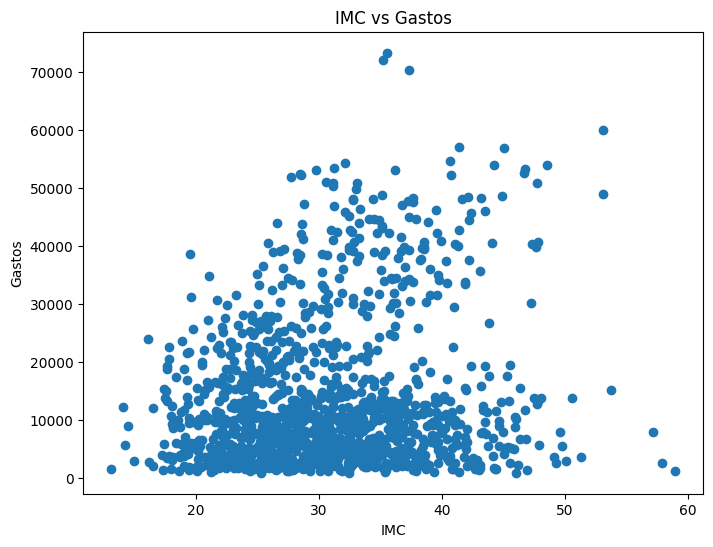

In [14]:
#Gráfico de dispersión para IMC vs Gastos

plt.figure(figsize=(8,6))
plt.scatter(df['IMC'], df['Gastos'])
plt.xlabel('IMC')
plt.ylabel('Gastos')
plt.title('IMC vs Gastos')
plt.show()

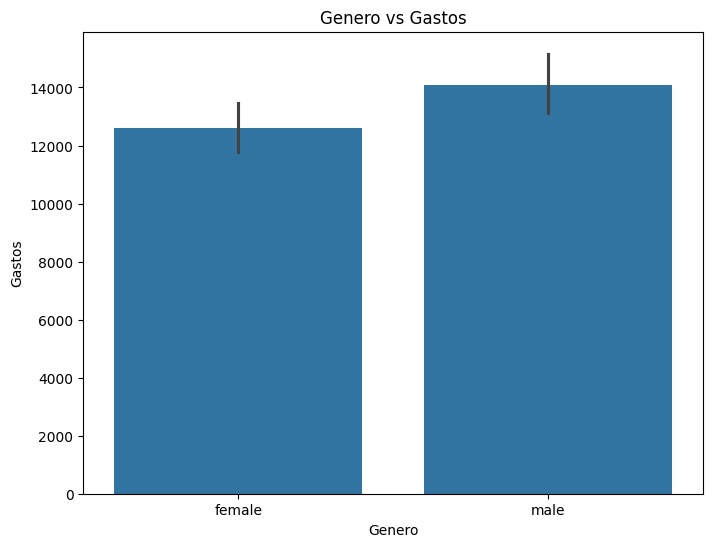

In [15]:
#Gráfico de barras apiladas para Genero vs Gastos

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Sexo', y='Gastos')
plt.xlabel('Genero')
plt.ylabel('Gastos')
plt.title('Genero vs Gastos')
plt.show()

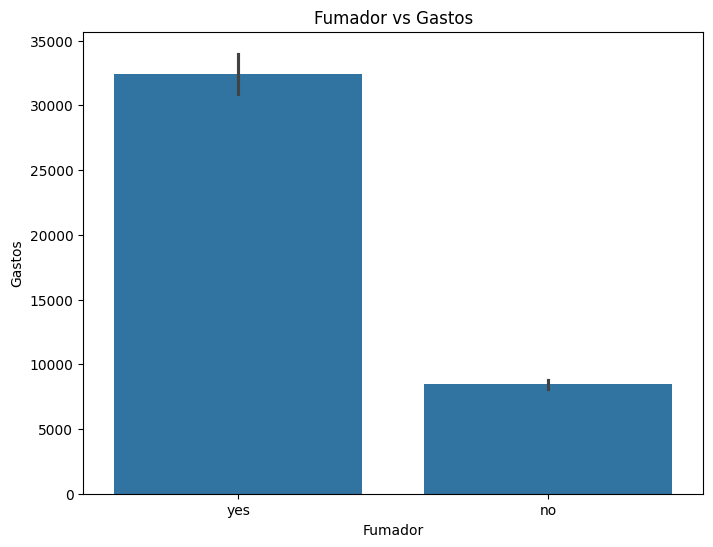

In [16]:
#Gráfico de barras apiladas para Fumador vs Gastos

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Fumador', y='Gastos')
plt.xlabel('Fumador')
plt.ylabel('Gastos')
plt.title('Fumador vs Gastos')
plt.show()

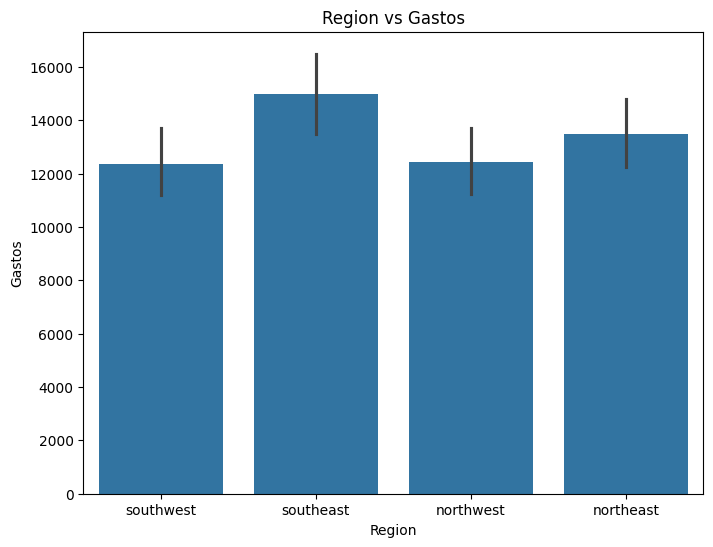

In [17]:
#Gráfico de barras apiladas para Region vs Gastos

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Region EEUU', y='Gastos')
plt.xlabel('Region')
plt.ylabel('Gastos')
plt.title('Region vs Gastos')
plt.show()

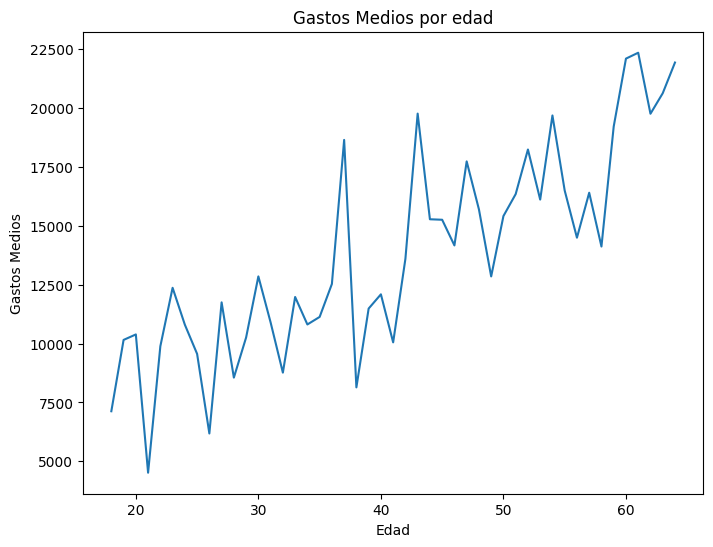

In [18]:
#Grafico de linea para el promedio de gastos por edad

avg_charges_by_age = df.groupby('Edad')['Gastos'].mean()
plt.figure(figsize=(8,6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Edad')
plt.ylabel('Gastos Medios')
plt.title('Gastos Medios por edad')
plt.show()

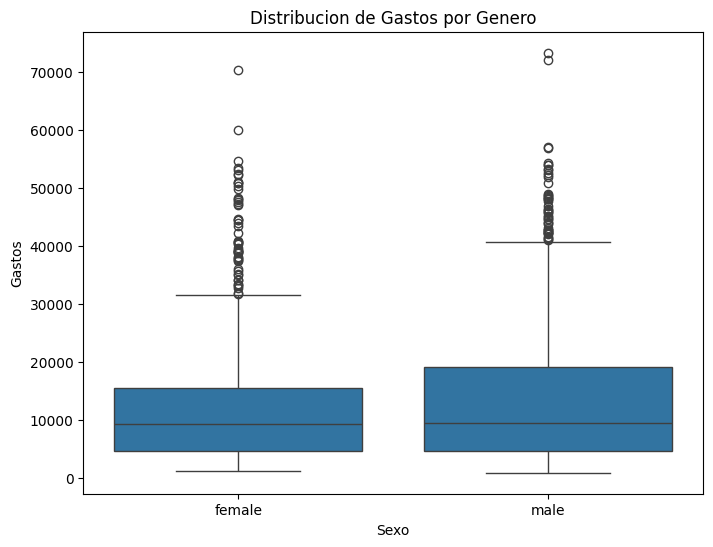

In [19]:
#Grafico de caja para cargos segun el Genero

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Sexo',y='Gastos')
plt.xlabel('Sexo')
plt.ylabel('Gastos')
plt.title('Distribucion de Gastos por Genero')
plt.show()

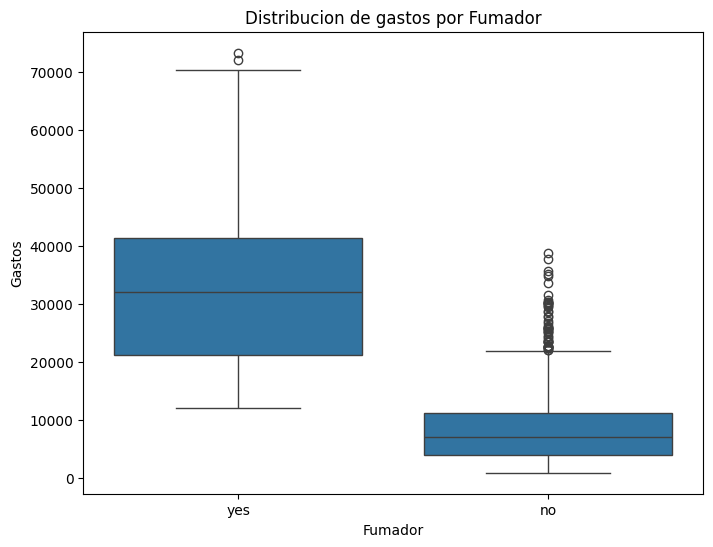

In [20]:
#Grafico de caja para cargos segun persona fumadora o no

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Fumador',y='Gastos')
plt.xlabel('Fumador')
plt.ylabel('Gastos')
plt.title('Distribucion de gastos por Fumador')
plt.show()

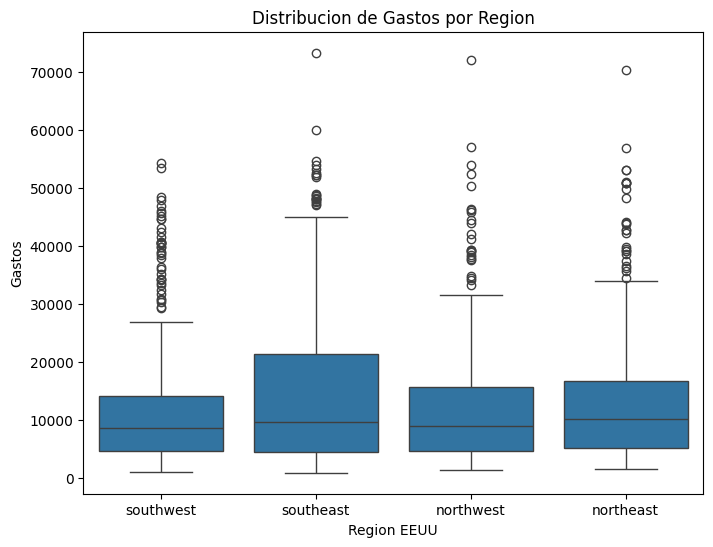

In [21]:

#Grafico de caja para cargos segun Region

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Region EEUU',y='Gastos')
plt.xlabel('Region EEUU')
plt.ylabel('Gastos')
plt.title('Distribucion de Gastos por Region')
plt.show()

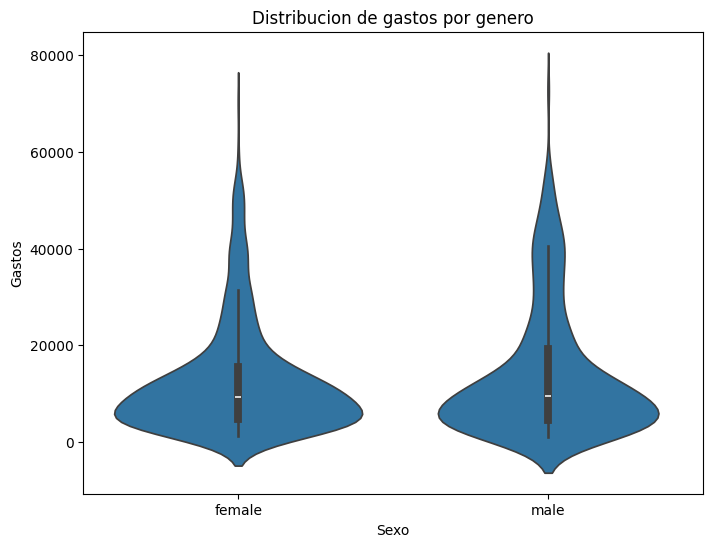

In [22]:
#Gráfico de violin para los gastos segun sexo

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Sexo',y='Gastos')
plt.xlabel('Sexo')
plt.ylabel('Gastos')
plt.title('Distribucion de gastos por genero')
plt.show()

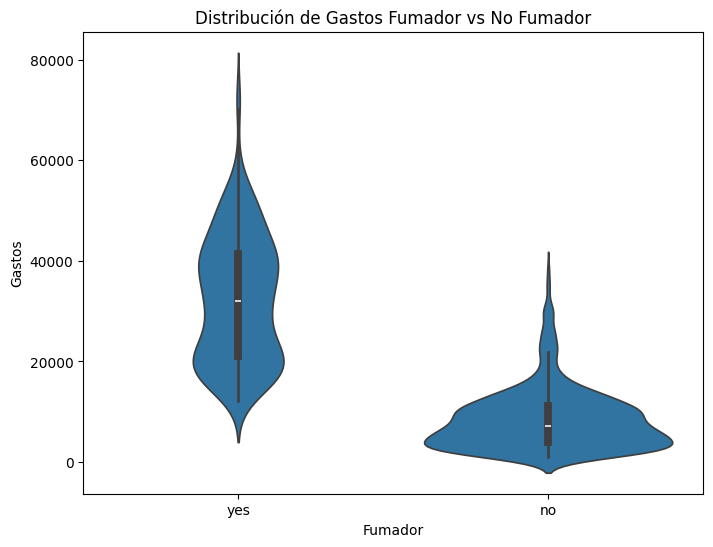

In [23]:
#Grafico de violin para cargos segun persona fumadora

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Fumador',y='Gastos')
plt.xlabel('Fumador')
plt.ylabel('Gastos')
plt.title('Distribución de Gastos Fumador vs No Fumador')
plt.show()

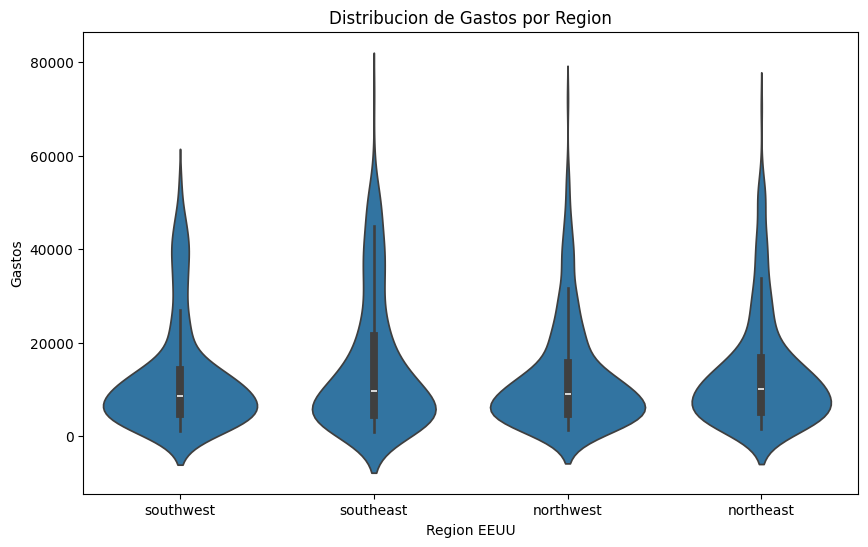

In [24]:
#Grafico de violin para Gastos según Region

plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Region EEUU',y='Gastos')
plt.xlabel('Region EEUU')
plt.ylabel('Gastos')
plt.title('Distribucion de Gastos por Region')
plt.show()


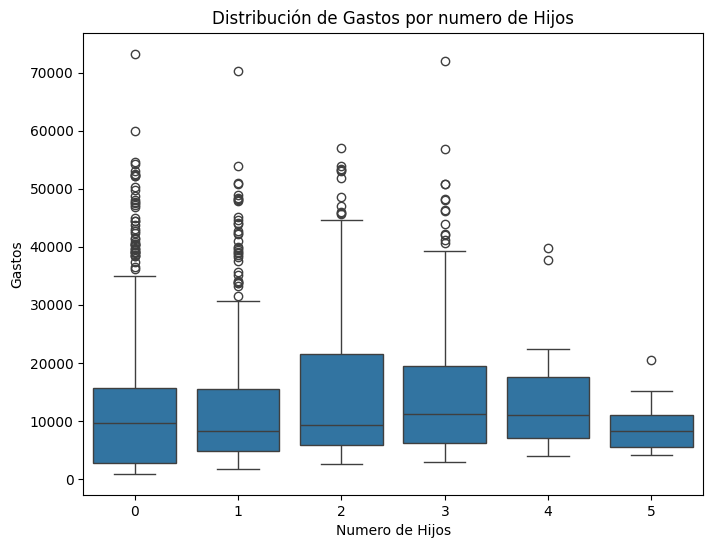

In [25]:
#Grafico de caja para cargos segun numero de hijos

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Hijos', y='Gastos')
plt.xlabel('Numero de Hijos')
plt.ylabel('Gastos')
plt.title('Distribución de Gastos por numero de Hijos')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19912\3984696606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_age_groups = df.groupby(age_groups)['Gastos'].mean()


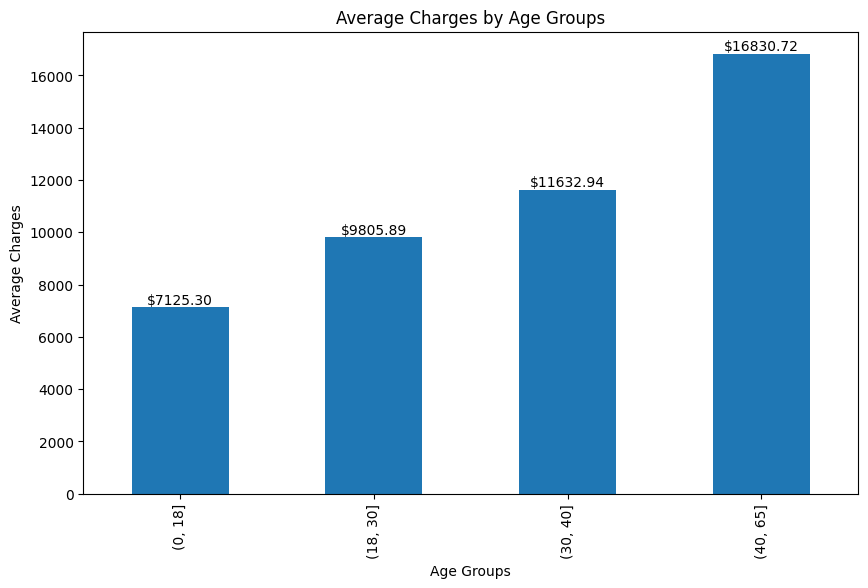

In [26]:
age_groups = pd.cut(df['Edad'], bins=[0, 18, 30, 40, 65])
avg_charges_by_age_groups = df.groupby(age_groups)['Gastos'].mean()
plt.figure(figsize=(10, 6))
bar_plot = avg_charges_by_age_groups.plot(kind='bar')

# Adding mean values with dollar sign above the bars
for i, mean_value in enumerate(avg_charges_by_age_groups):
    bar_plot.text(i, mean_value + 10, f'${mean_value:.2f}', ha='center', va='bottom')

plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19912\3928749602.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['Gastos'].mean()


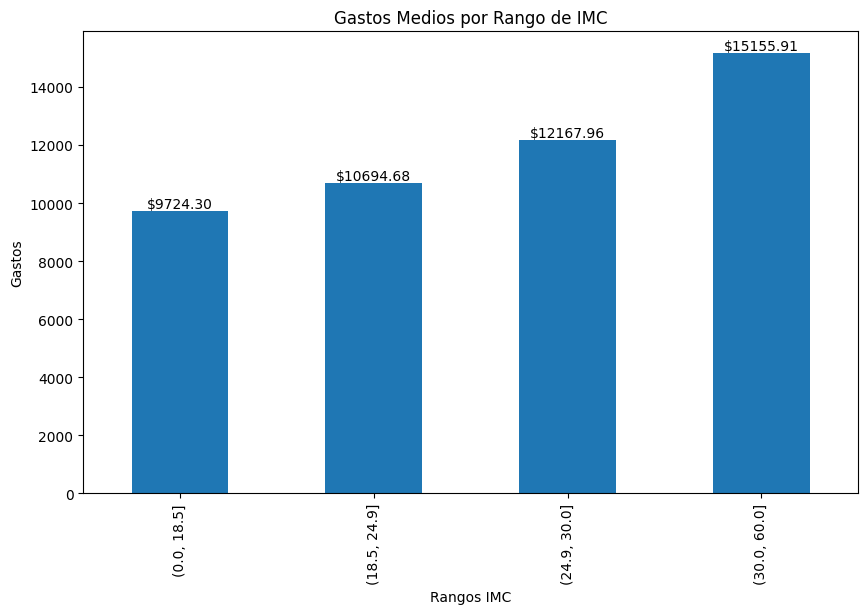

In [27]:
#Grafico de barra para cargos promedios segun rango de BMI

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing data
bmi_ranges = pd.cut(df['IMC'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['Gastos'].mean()
plt.figure(figsize=(10, 6))
bar_plot = avg_charges_by_bmi_ranges.plot(kind='bar')

# Adding mean values with dollar sign above the bars
for i, mean_value in enumerate(avg_charges_by_bmi_ranges):
    bar_plot.text(i, mean_value + 10, f'${mean_value:.2f}', ha='center', va='bottom')

plt.xlabel('Rangos IMC')
plt.ylabel('Gastos')
plt.title('Gastos Medios por Rango de IMC')
plt.show()


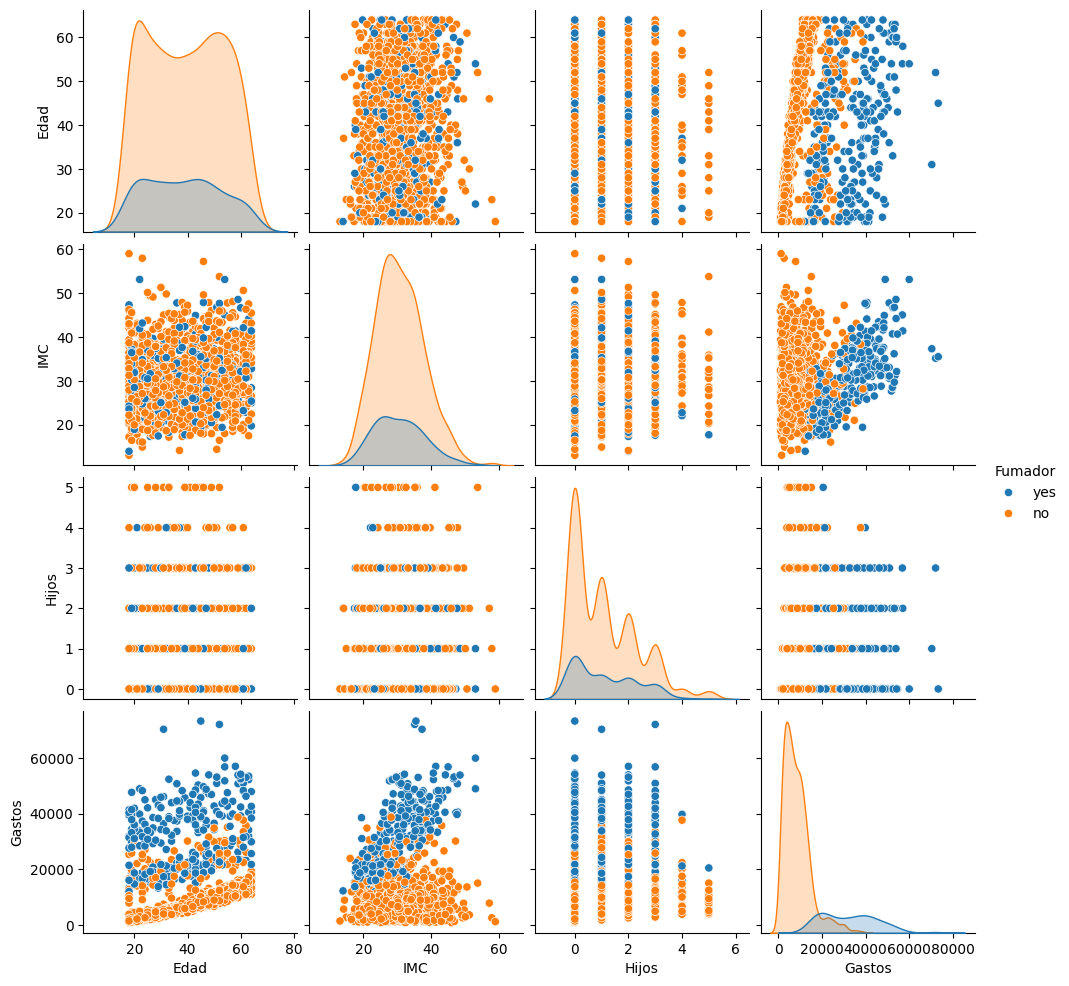

In [28]:
#Grafico de pares

sns.pairplot(df, hue='Fumador')
plt.show()

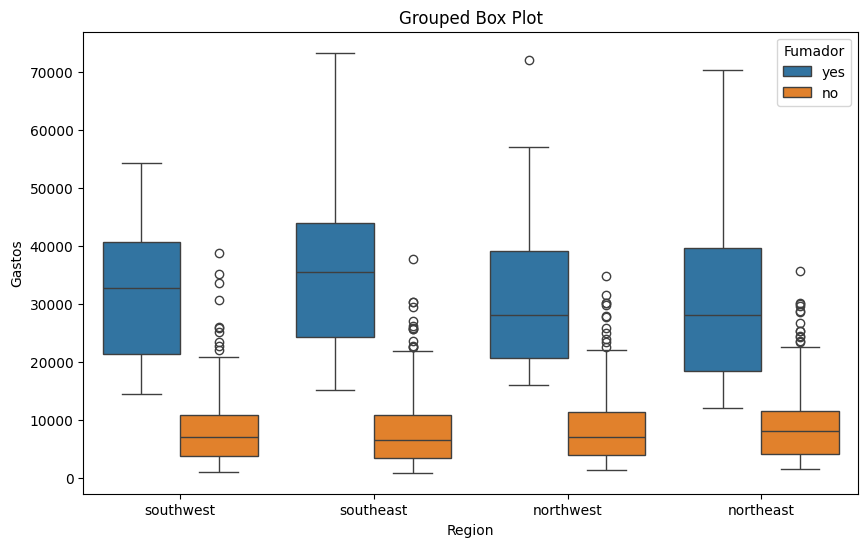

In [29]:
#Análisis Multivariado
#Gráfico de caja agrupado segun region y persona fumadora
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region EEUU', y='Gastos', hue='Fumador')
plt.xlabel('Region')
plt.ylabel('Gastos')
plt.title('Grouped Box Plot')
plt.show()

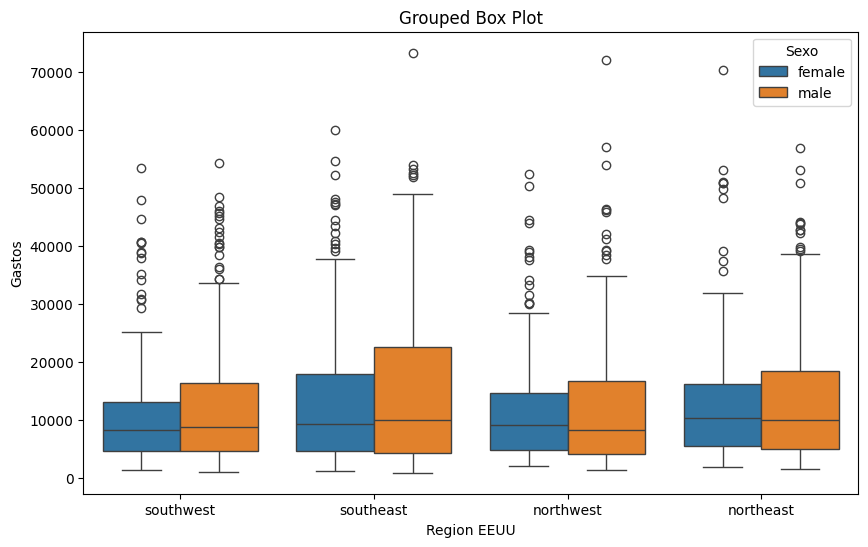

In [30]:
# Grafico de caja agrupada segun region y genero

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region EEUU', y='Gastos', hue='Sexo')
plt.xlabel('Region EEUU')
plt.ylabel('Gastos')
plt.title('Grouped Box Plot')
plt.show()

In [31]:
#Matriz de correlacion
#Ajustamos las columnas
data = df.copy()
data['Fumador'] = data['Fumador'].map({'yes': 1, 'no': 0})
categorical_columns = ['Region EEUU','Sexo']
numerical_columns = ['Edad','IMC','Hijos','Fumador','Gastos']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [32]:
#Escalado de Datos
scaler = StandardScaler()

#Realizamos el escalamiento de las variables numericas
scaled_numerical = scaler.fit_transform(data[numerical_columns])

#Convertimos a las variables numericas escaladas
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

#Eliminamos las variables numericas origniales
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

#Concatenamos las variables dummies y las variables numericas escaladas
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

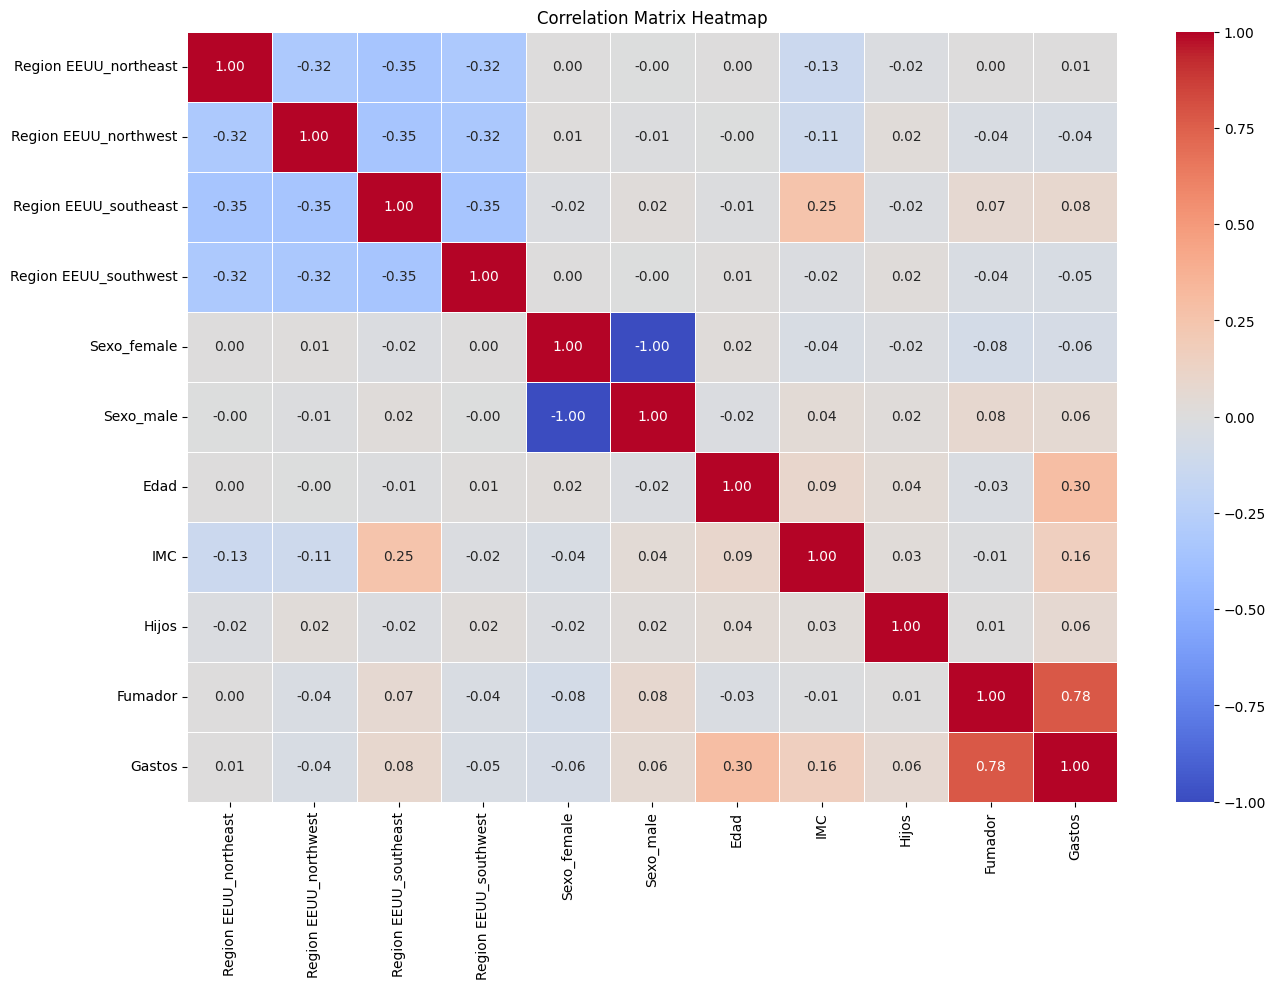

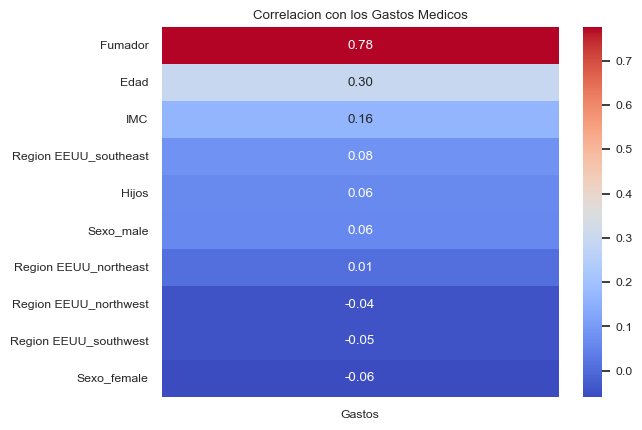

In [33]:
correlation_matrix = processed_df.corr()

#Grafico 1

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['Gastos'].drop('Gastos')

#Ordenamos los valores de la correlacion
target_corr_sorted = target_corr.sort_values(ascending=False)

#Grafico 2

#Creamos un mapa de calor con las correlaciones y la variable objetivo

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlacion con los Gastos Medicos")
plt.show()

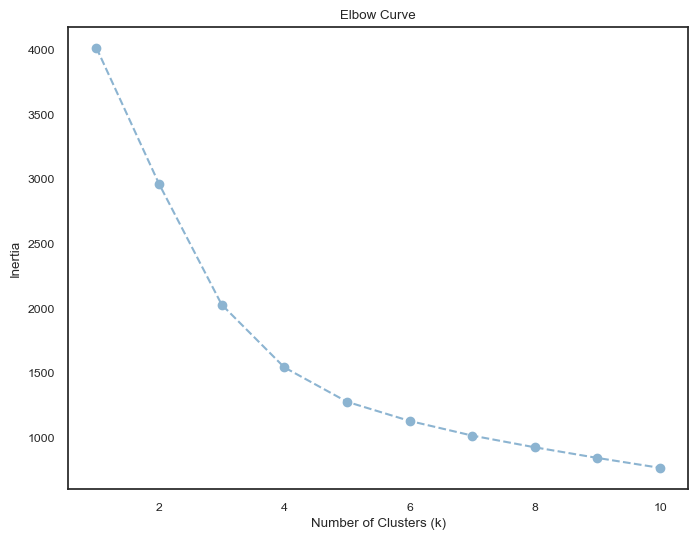

In [34]:
#Análisis Clustering
#Seleccionamos las variables para el clustering

features = ['Edad', 'IMC', 'Gastos']
categorical_features = ['Sexo','Fumador']

#Convertimos las variables categoricas a numericas utilizando one-hot encoding

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded[features]

#Escalamos las variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Determinamos el numero optimo de clusters utilizando el metodo elbow

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos el Elbow 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

              Edad        IMC        Gastos
cluster                                    
0        27.222962  28.986106   6371.195424
1        40.564706  35.422824  40572.159412
2        51.502646  31.224427  12616.112540


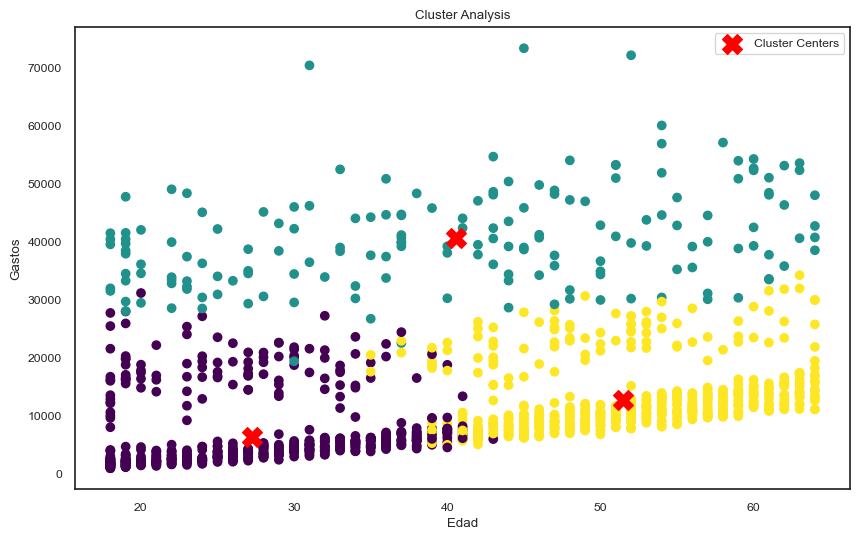

In [35]:
#Elegimos el optimo numero de cluster basandonos en la curva de elbow

k=3

#Realizamos el clusterizado con k-means

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

#Agregamos la variable "cluster" al conjunto de datos

df['cluster'] = labels

#Analizamos el cluster
cluster_analysis = df.groupby('cluster')[features].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Edad'], df['Gastos'], c=df['cluster'], cmap='viridis')
plt.scatter(cluster_analysis['Edad'], cluster_analysis['Gastos'], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Edad')
plt.ylabel('Gastos')
plt.title('Cluster Analysis')
plt.legend()
plt.show()

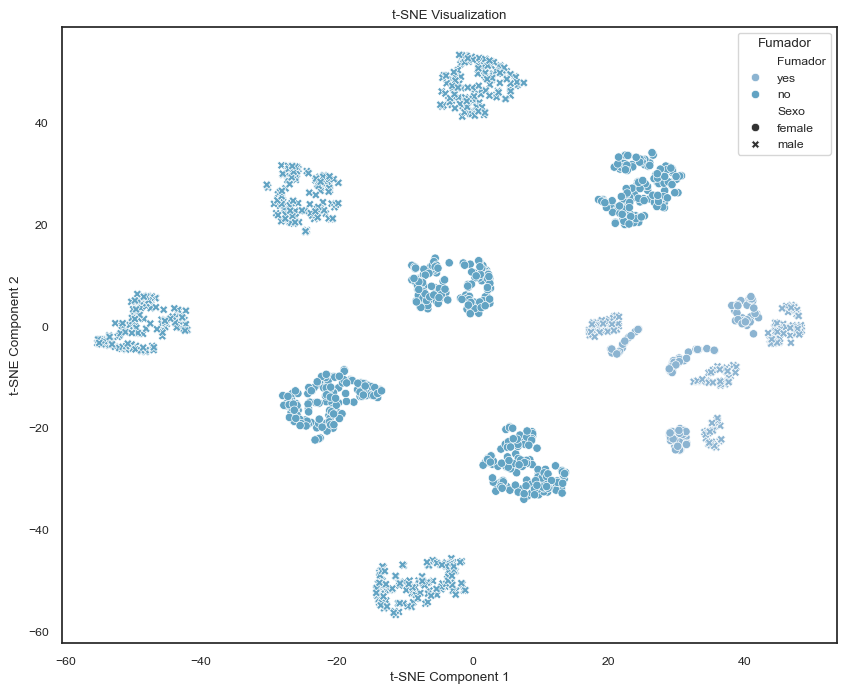

In [36]:
#Calidad del clustering
#Seleccionamos las variables para el grafico t-SNE
numerical_features = ['Edad', 'IMC', 'Gastos']
categorical_features = ['Sexo', 'Fumador', 'Region EEUU']

# Realizamos el encoding para las variables categoricas
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Realizamos escalamiento para las variables
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded[numerical_features + list(df_encoded.columns[df_encoded.columns.str.startswith(tuple(categorical_features))])])

# Realizamos el t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Creamos el grafico
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Fumador'], style=df['Sexo'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.legend(title='Fumador', loc='upper right')
plt.show()

In [37]:
#Análisis Predictivo
#Volvemos a cargar el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv',sep=';',decimal=',')
df = df.drop_duplicates()
#Encoding
le = LabelEncoder()
df['Sexo'] = le.fit_transform(df['Sexo'])
df['Fumador'] = le.fit_transform(df['Fumador'])
df['Region EEUU'] = le.fit_transform(df['Region EEUU'])

#Separamos los datos en variables a utilizar (X) y variable objetivo (y)

X = df.drop(columns=['Gastos'])
y = df['Gastos']

#Dividimos el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Gradient Boosting Regression
#Iniciamos el modelo

model = GradientBoostingRegressor(random_state=42)

#Ajustamos el modelo a los datos

model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
#Realizamos la validacion cruzada con 10-fold

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(f"Cross-validated MSE: {-np.mean(scores)}")

#Optimizacion de los Hiperparámetros
#Definimos los valores para itinerar y elegir los mejores parametros
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01,0.1,1],
    'max_depth': [3,4,5]
}

#Iniciamos la busqueda de hiperparámetros

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=1, verbose=1)

#Ajustamos a los datos de entrenamiento y prueba
grid_search.fit(X_train,y_train)

#Obtenemos los mejores parametros
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Cross-validated MSE: 34223881.7638763
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [40]:
#Actualizamos el modelo con los parametros encontrados

model = grid_search.best_estimator_

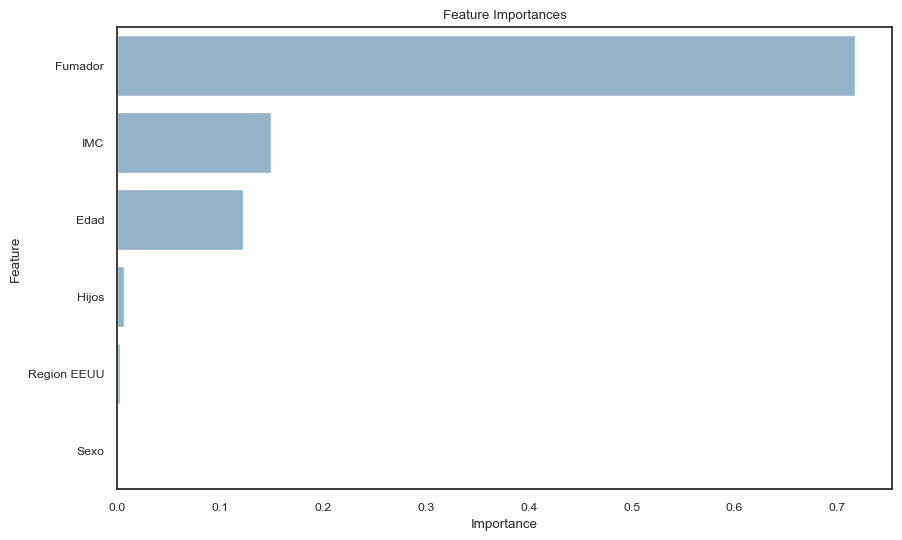

In [41]:
#Caracteristicas mas importantes
#Obtenemos la importancia de cada variable

importances = model.feature_importances_

#Creamos un conjunto de datos

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Ordenamos por importancia

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#Veemos una grafica con lo realizado
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [42]:
#Realizamos las predicciones

y_pred = model.predict(X_test)

#Calculamos MAE, MSE, RMSE, R2

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # or mse**(0.5)  
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Calculamos RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calculamos MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)

MAE: 3598.524830754325
MSE: 30950749.255401414
RMSE: 5563.339757322162
R2 Score: 0.8033285710537521
RMSLE: 0.4723714539143184
MAPE: 42.79345378797616


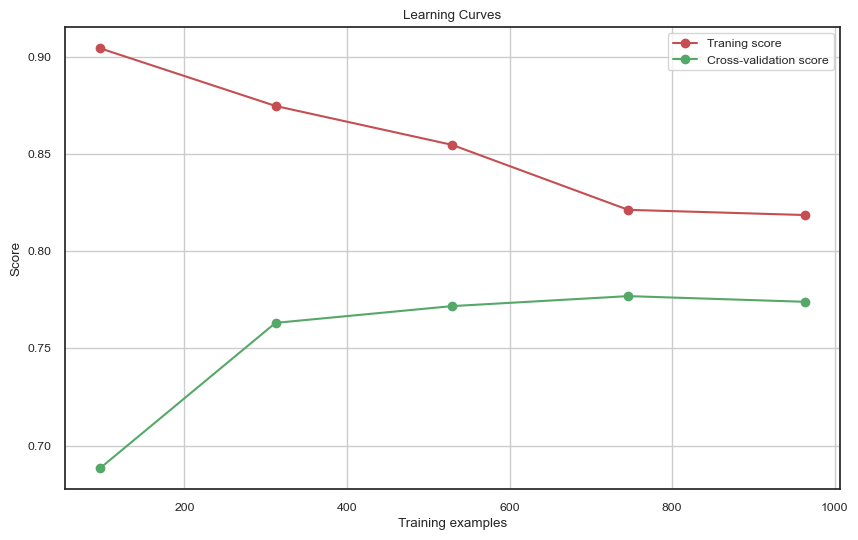

In [43]:
#Graficamos la curva de aprendizaje (learning curve)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Traning score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [44]:
#Random Forest
#Importamos las librerias necesarias
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed,cpu_count
import optuna

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
# División de los datos de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns="Gastos"),
    df['Gastos'],
    test_size=0.25,
    random_state=123
)
print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto test: {X_test.shape[0]}")

#Creacion del Modelo
modelo = RandomForestRegressor(
    n_estimators = 10,
    criterion = 'squared_error',
    max_depth = None,
    max_features = 1,
    oob_score = False,
    n_jobs = -1,
    random_state = 123
)
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

Tamaño conjunto entrenamiento: 1003
Tamaño conjunto test: 335


RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [46]:
#Error de test del modelo inicial
predicciones= modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test,y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 7091.967238462728


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Optimal value of n_estimators: 196


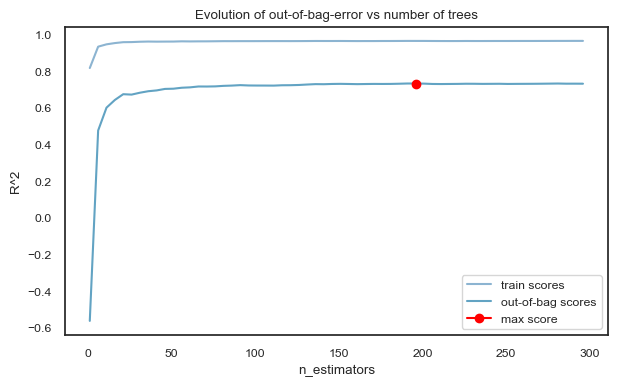

In [47]:
##Busqueda del numero de arboles óptimo
train_scores = []
oob_scores = []  # corrected variable name

# Values to evaluate
estimator_range = range(1, 300, 5)

# Loop to train a model with each value of n_estimators and extract its training error and out-of-bag error
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
        n_estimators=n_estimators,
        criterion='squared_error',
        max_depth=None,
        max_features=1,
        oob_score=True,  # changed to True to calculate OOB score
        n_jobs=-1,
        random_state=123
    )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)  # corrected variable name

# Plot showing the evolution of the errors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores), marker='o', color="red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolution of out-of-bag-error vs number of trees")
plt.legend()
print(f"Optimal value of n_estimators: {estimator_range[np.argmax(oob_scores)]}")


Optimal value of n_estimators: 331


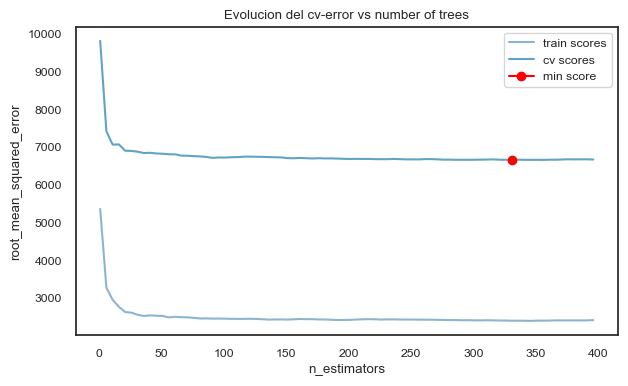

In [48]:
#Validación empleando k-cross-validation y neg_root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate root mean squared error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

train_scores = []
cv_scores = []
estimator_range = range(1, 400, 5)

for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
        n_estimators=n_estimators,
        criterion='squared_error',
        max_depth=None,
        max_features=1,
        oob_score=False, 
        n_jobs=-1,
        random_state=123
    )
    # Error de entrenamiento
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X=X_train)
    rmse = root_mean_squared_error(
        y_true=y_train,
        y_pred=predicciones,
    )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
        estimator=modelo,
        X=X_train,
        y=y_train,
        scoring='neg_root_mean_squared_error',
        cv=5
    )    
    cv_scores.append(-1 * scores.mean())

# Plot showing the evolution of the errors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores), marker='o', color="red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolucion del cv-error vs number of trees")
plt.legend()
print(f"Optimal value of n_estimators: {estimator_range[np.argmin(cv_scores)]}")


Optimal value of max_features: 3


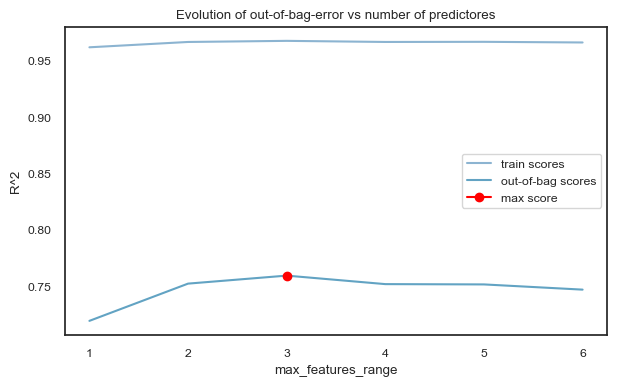

In [49]:
#Max Features
#Out-of-Bag error
train_scores = []
oob_scores = [] 

# Values to evaluate
max_features_range = range(1,X_train.shape[1] + 1, 1)

# Loop to train a model with each value of n_estimators and extract its training error and out-of-bag error
for max_features in max_features_range:
    modelo = RandomForestRegressor(
        n_estimators=100,
        criterion='squared_error',
        max_depth=None,
        max_features=max_features,
        oob_score=True,  # changed to True to calculate OOB score
        n_jobs=-1,
        random_state=123
    )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)  # corrected variable name

# Plot showing the evolution of the errors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores), marker='o', color="red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features_range")
ax.set_title("Evolution of out-of-bag-error vs number of predictores")
plt.legend()
print(f"Optimal value of max_features: {max_features_range[np.argmax(oob_scores)]}")

Optimal value of max_features: 3


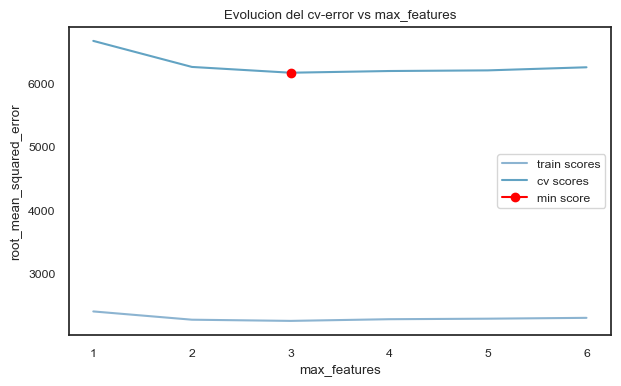

In [50]:
# Function to calculate root mean squared error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define ranges for max_features
max_features_range = range(1, 7)

train_scores = []
cv_scores = []

for max_features in max_features_range:
    modelo = RandomForestRegressor(
        n_estimators=300,  # Choose an appropriate number
        criterion='squared_error',
        max_depth=None,    # You can also vary max_depth if needed
        max_features=max_features,
        oob_score=False, 
        n_jobs=-1,
        random_state=123
    )
    # Error de entrenamiento
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X=X_train)
    rmse = root_mean_squared_error(
        y_true=y_train,
        y_pred=predicciones,
    )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
        estimator=modelo,
        X=X_train,
        y=y_train,
        scoring='neg_root_mean_squared_error',
        cv=5
    )    
    cv_scores.append(-1 * scores.mean())

# Plot showing the evolution of the errors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores), marker='o', color="red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolucion del cv-error vs max_features")
plt.legend()
print(f"Optimal value of max_features: {max_features_range[np.argmin(cv_scores)]}")

In [51]:
# Grid de hiperparámetros evaluados
param_grid = ParameterGrid({
    'n_estimators': [350],
    'max_features': [3, 5, 7],
    'max_depth': [None, 3, 10, 20]  # Valores enteros
})

# Convertir los valores de max_depth a enteros
param_grid = [{'n_estimators': params['n_estimators'],
               'max_features': params['max_features'],
               'max_depth': int(params['max_depth']) if params['max_depth'] is not None else None}
              for params in param_grid]

# Loop para ajustar un modelo con cada combinación de hiperparámetros
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    modelo = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_features=params['max_features'],
        max_depth=params['max_depth'],  # Mantener el valor como está
        oob_score=True,
        n_jobs=-1,
        random_state=123
    )
    modelo.fit(X_train, y_train)
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {modelo}")

# Resultados
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns='params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)





Modelo: RandomForestRegressor(max_features=3, n_estimators=350, n_jobs=-1,
                      oob_score=True, random_state=123)
Modelo: RandomForestRegressor(max_features=5, n_estimators=350, n_jobs=-1,
                      oob_score=True, random_state=123)
Modelo: RandomForestRegressor(max_features=7, n_estimators=350, n_jobs=-1,
                      oob_score=True, random_state=123)
Modelo: RandomForestRegressor(max_depth=3, max_features=3, n_estimators=350, n_jobs=-1,
                      oob_score=True, random_state=123)
Modelo: RandomForestRegressor(max_depth=3, max_features=5, n_estimators=350, n_jobs=-1,
                      oob_score=True, random_state=123)
Modelo: RandomForestRegressor(max_depth=3, max_features=7, n_estimators=350, n_jobs=-1,
                      oob_score=True, random_state=123)
Modelo: RandomForestRegressor(max_depth=10, max_features=3, n_estimators=350, n_jobs=-1,
                      oob_score=True, random_state=123)
Modelo: RandomForestRegressor(

,oob_r2,n_estimators,max_features,max_depth
4,0.767079,350.0,5.0,3.0
5,0.766047,350.0,7.0,3.0
6,0.761679,350.0,3.0,10.0
9,0.761262,350.0,3.0,20.0


In [52]:
#Creacion del Modelo Final
modelo_final = RandomForestRegressor(
    n_estimators = 350,
    criterion = 'squared_error',
    max_depth = 3,
    max_features = 5,
    oob_score = False,
    n_jobs = -1,
    random_state = 123)

#Entrenamiento del modelo
modelo_final.fit(X_train, y_train)
predicciones = modelo_final.predict(X=X_test)
rmse = root_mean_squared_error(y_true = y_test, y_pred=predicciones)
print (f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 5303.0564434692205


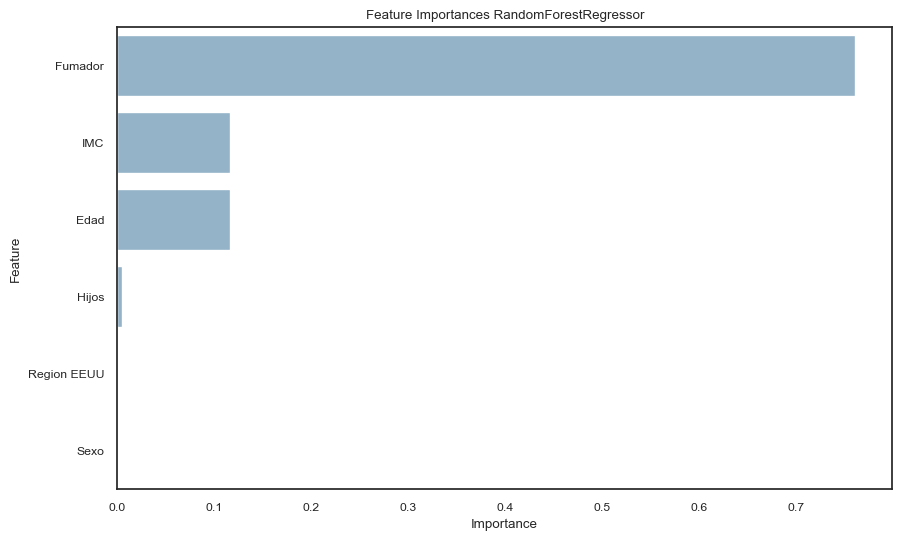

In [53]:
#Caracteristicas mas importantes
#Obtenemos la importancia de cada variable

importances = modelo_final.feature_importances_

#Creamos un conjunto de datos

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Ordenamos por importancia

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#Veemos una grafica con lo realizado
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances RandomForestRegressor')
plt.show()